# Project: Investigate a tmdb-movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I choose tmdb-movies Dataset to Analyze.Contains observations of 10k+ movies like title, budget, revenue, cast, director, tagline, keywords, genres, release date, runtime etc.

 >  **includes**:
    - Total Raws= 10866
    - Total Columns=21

## questions 
>
- 1) runtime vs popularity
- 2) most generated Keyword
- 3) most years with high revenue
- 4) Which production company has most popularity?
- 5) Who is the most frequency actors?
- 6) Who is the most frequency Directors ?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
#Loding data and see samples of data
movie_df=pd.read_csv('tmdb-movies.csv')

movie_df.sample(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
135,266396,tt2515034,1.225325,40000000,10664749,The Gunman,Sean Penn|Jasmine Trinca|Javier Bardem|Ray Win...,NaN,Pierre Morel,Armed With the Truth.,...,Eight years after fleeing the Congo following ...,115,Action|Drama|Crime,StudioCanal|Silver Pictures|TF1 Films Producti...,2/16/15,283,5.6,2015,3.679998e+07,9.811565e+06
6391,17455,tt0337636,0.347958,4000000,0,Hellraiser: Deader,Kari Wuhrer|Paul Rhys|Simon Kunz|Marc Warren|G...,NaN,Rick Bota,The Latest. Most Terrifying Evil.,...,"In London, after investigating crack addicted ...",88,Horror|Thriller|Mystery,Castel Film Romania|Neo Art & Logic|Stan Winst...,6/7/05,27,4.6,2005,4.466253e+06,0.000000e+00


In [4]:
movie_df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


> notes
 - from those raws we notice that the budget and revenue =0 and that is impossible,there is missing data


In [5]:
# describe data 
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
movie_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>  notes
- there is many missing values that's difficult to handle
- we need to fix datatype of release_year column

In [7]:
nulls= movie_df.isnull().sum()
nulls

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
nulls.sum()

13434

> notes:
- there is 13434 missing value which is difficult to dropped 
- there is unnecessary columns =>(imbd_id, homepage, tagline, overview, budget_adj, revenue_adj) so we need to dropped it 


In [9]:
movie_df.duplicated().sum() #show duplicates 

1

> notes:
- we have 1 duplicate row

In [10]:
zero_bud_rev=movie_df[['budget','revenue']]==0 #Rows With Zero Values In The Budget, revenue Columns
zero_bud_rev.sum()

budget     5696
revenue    6016
dtype: int64




### Data Cleaning 

- 1) fix datatype of release_date column

In [11]:
movie_df['release_date']=movie_df['release_date'].astype('datetime64[ns]')

check datatype 

In [12]:
movie_df['release_date'].head(1)

0   2015-06-09
Name: release_date, dtype: datetime64[ns]

- 2) drop unnecessary columns

In [13]:
movie_df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],inplace=True,axis=1)

check columns

In [14]:
movie_df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

- 3) drop duplicated raw

In [15]:
movie_df.drop_duplicates(inplace=True)

check the duplicates 

In [16]:
movie_df.duplicated().sum()

0

In [17]:
movie_df.shape

(10865, 15)

In [18]:
if movie_df['id'].nunique()==10865:
    movie_df.set_index('id', inplace=True)#make id column as index for Data Fram 
else:
    print("id isn't unique column ")

In [19]:
movie_df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis

>

### Research Question 1 (runtime vs popularity )

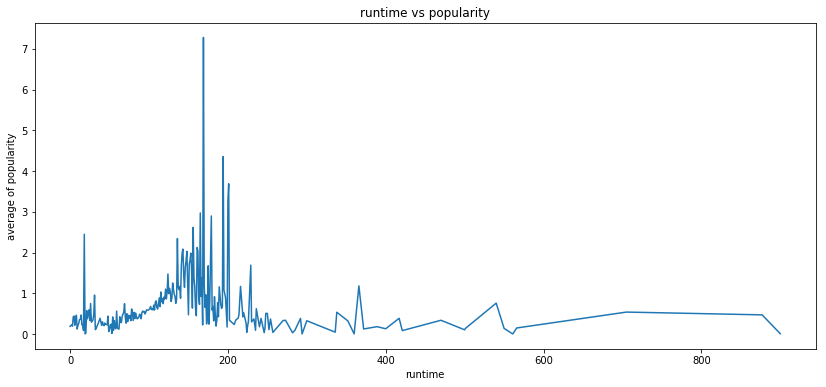

In [20]:
fig1=movie_df.groupby('runtime')['popularity'].mean()
plt.figure(figsize=(14,6))
plt.title('runtime vs popularity')
plt.xlabel('runtime')
plt.ylabel('average of popularity')
plt.plot(fig1)
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

***we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.***

### Research Question 2  (most generated Keyword)

In [21]:
txt=','.join(movie_df['keywords'].str.cat(sep='|').split('|'))

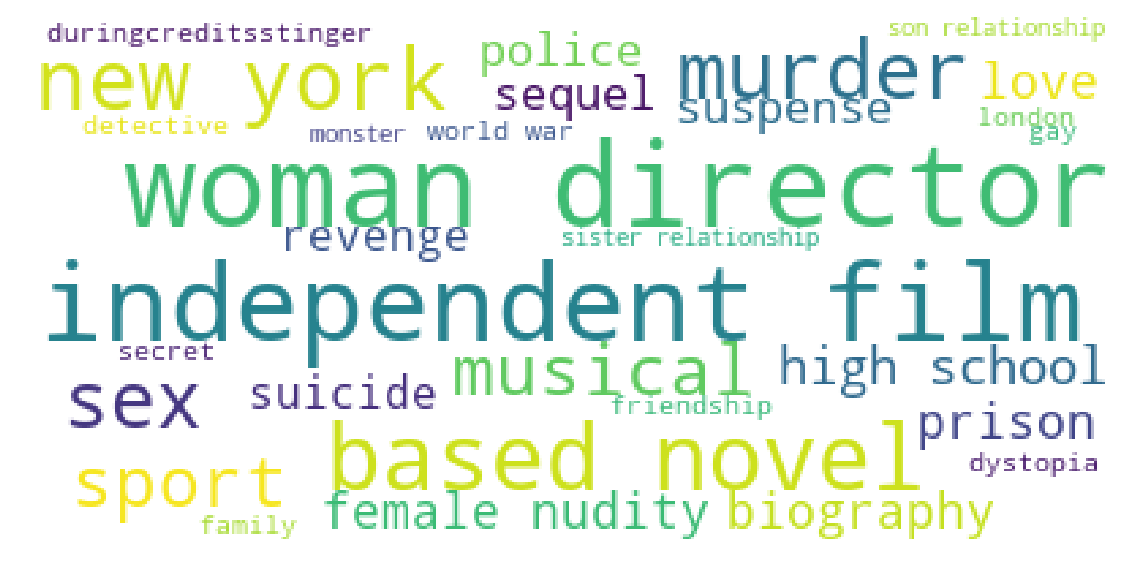

In [22]:
from wordcloud import WordCloud
cloud= WordCloud(max_words=30,background_color='white').generate_from_text(txt)
plt.imshow(cloud)
plt.axis('off')
plt.show()

***we see the most generated Keywords is independent, woman, director***

### Research Question 3  (most years with high revenue )

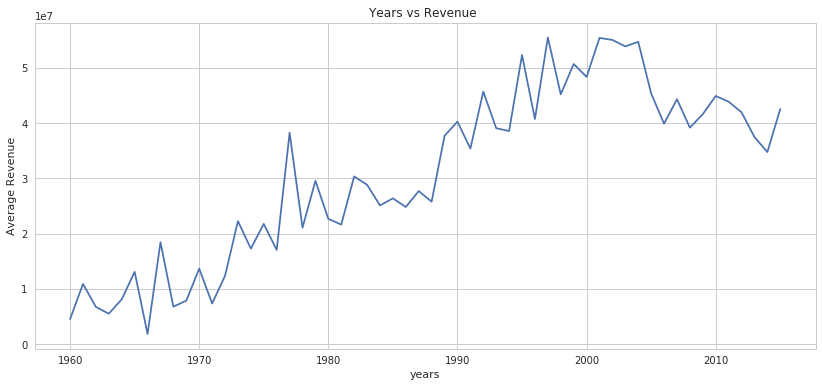

In [23]:
fig1=movie_df.groupby('release_year')['revenue'].mean()
plt.figure(figsize=(14,6))
plt.title('Years vs Revenue ')
plt.xlabel('years')
plt.ylabel('Average Revenue')
plt.plot(fig1)
sns.set_style("whitegrid")

***we see that between 1995-2005 has high revenue.***

### Research Question 4  (Which production company has most popularity?)

In [24]:
def count(column):
    data = movie_df[column].str.cat(sep="|").split("|")
    inf= pd.Series(data).value_counts()
    
    return inf

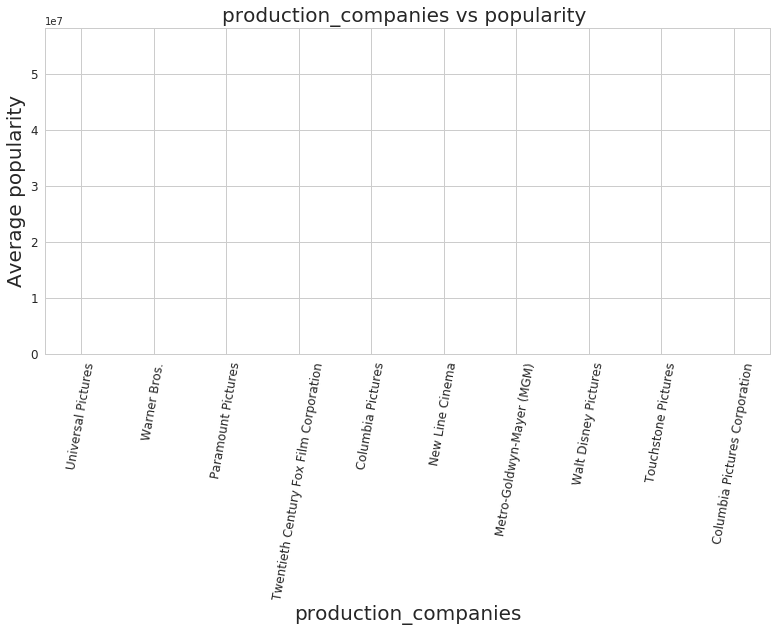

In [26]:
count_company=count('production_companies')


count_company.iloc[:10].plot.bar(figsize=(13,6),fontsize=12)
plt.title('production_companies vs popularity ',fontsize=20)
plt.xlabel('production_companies',fontsize=20)
plt.xticks(rotation=80)
plt.ylabel('Average popularity',fontsize=20)
plt.plot(fig1, color='blue')


In [ ]:
**the

### Research Question 4  (Who is the most frequency actors?)

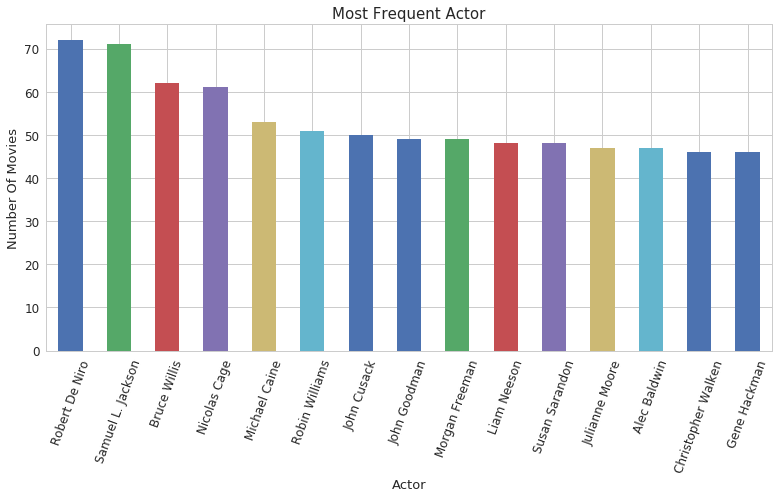

In [27]:
count_actors=count('cast')


count_actors.iloc[:15].plot.bar(figsize=(13,6),fontsize=12)

plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

***most frequency Actor is Robert de niro***

### Research Question 5  (Who is the most frequency Directors ?)

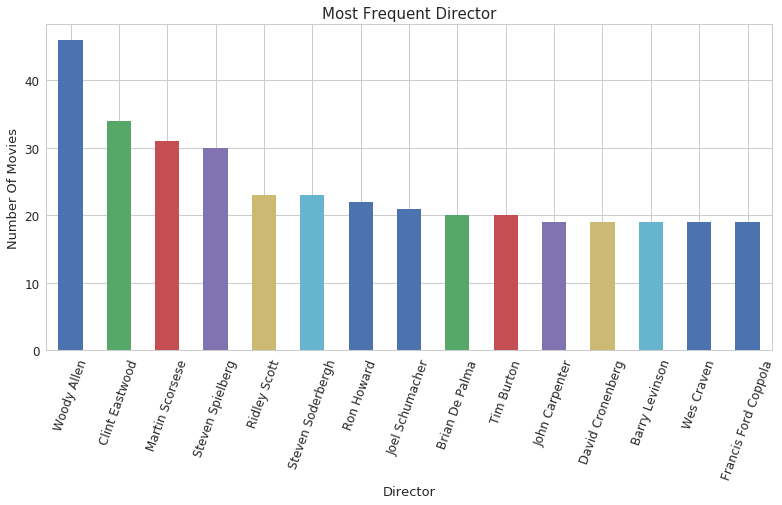

In [29]:
count_directore=count('director')


count_directore.iloc[:15].plot.bar(figsize=(13,6),fontsize=12)

plt.title("Most Frequent Director",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Director',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

***we see that most frequency director is woody allen.***

<a id='conclusions'></a>
## Conclusions

>
- movies in the range of 100-200 runtime are more popular than other runtime movies. 
- we see the most generated Keywords is independent, woman, director
- we see that between 1995-2005 has high revenue.
- most frequency production companies.
- most frequency actors
- most frequency directors

## Limitations 

>
- wen i try to clean data there was many mising values that i couldn't cleaned 
- i have to split | from som data to represent it 
- many numbers of budget and revenue equequal to zero so i couldn't handle it 

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a Dataset.ipynb'])

0